<div style="border:solid green 2px; padding: 20px">
    
<b>Hello, Caleb!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. My name is Alexander Matveevsky. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

Integrated Project: Analyzing games data and drawing conclustions


This project is about working with data and drawing conlusions from data. Some new columns will be added in the process of finding patterns to determine which games will be 'winners'. It culminates in some statistic tests that will provide insight about the different platforms' use, and different genres' popularity.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). 

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np            #for corr function
import pandas as pd          
import plotly.express as px  #for scatterplot  
           

In [ ]:
games_df = pd.read_csv('/datasets/games.csv')

In [ ]:
games_df.info()               #call info to get a generalidea of the data

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №3__

Some blocks of code are not working. Please see what went wrong. Before submitting a project, you should check if the code works - you can do this by clicking on the Jupiter Hub Kernel and Restart & Run All panels 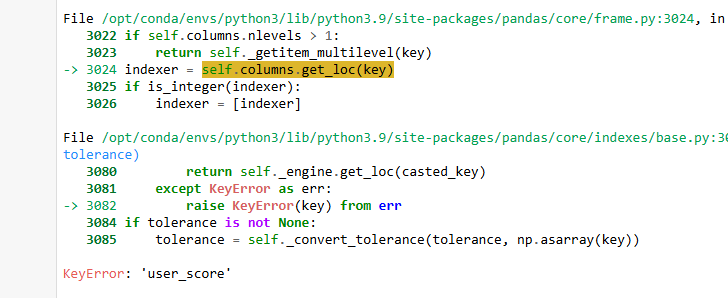

In [ ]:
games_df['User_Score'].fillna(5,inplace=True)

In [ ]:
games_df['User_Score'].sample(50)

In [ ]:
games_df.duplicated().sum() #No fully duplicated rows

<div class="alert alert-block alert-success">✔️

__Reviewer's comment №1__
    
Duplicate checking is the basis of data preprocessing

In [ ]:
games_df.head()                     #to see a sample


In [ ]:
games_df.columns = games_df.columns.str.lower() #1st edit, way simpler to do this!

In [ ]:
games_df.head()

In [ ]:
print(games_df.columns.str.replace(' ', ''))
#check that all the columns are looking how they should be ##remove cell 9

In [ ]:
columns =['Name','Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales','JP_sales','Other_sales', 
          'Critic_Score','User_Score','Rating']
#List columns in order to rename them as lower case  ##not needed

In [ ]:
games_df = games_df.rename(columns = {    
           'Name':'name',
    'Platform':'platform',
    'Year_of_Release':'year_of_release',
    'Genre':'genre',
    'NA_sales':'na_sales',
   'EU_sales':'eu_sales',
    'JP_sales':'jp_sales',
    'Other_sales':'other_sales',
    'Critic_Score':'critic_score',
    'User_Score':'user_score',
    'Rating':'rating'
})
               #rename columns ##removed cell 11

In [ ]:
games_df.head()

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


it is better to use str.lower() method

In [ ]:
unique_years = (games_df['year_of_release'].unique())

sorted(unique_years)             #to see which period the data covers

In [ ]:
grouped_games = games_df.groupby('year_of_release')['name'].nunique()

grouped_games                                  #to see the number of unique games released each year

In [ ]:
games_df['year_of_release']

In [ ]:
games_df['total_sales']=games_df['na_sales']+games_df['eu_sales']+games_df['jp_sales']+games_df['other_sales']
#to add a total sales column to the dataframe

<div class="alert alert-block alert-success">✔️

__Reviewer's comment №1__
    
You can also use sum with axis=1 argument

In [ ]:
games_df.head()    
#checking that the column is there

In [ ]:
compare_platforms = games_df.groupby('platform')['total_sales'].count()

compare_platforms

#PS2 and DS are the two platforms that had the most sales PS3 and Wii are the next two with PSP rounding out the top 5

In [ ]:
compare_platforms.plot(kind='bar', title='Comparing Platforms Total Sales', rot = 45)

plt.show()

In [ ]:
ps2_sales = games_df[games_df['platform']=='PS2']        #ps2 platform data slice

ps2_total = ps2_sales.groupby(['name', 'total_sales'])['year_of_release'].value_counts()

ps2_total

In [ ]:
fig=px.scatter_3d(ps2_sales, x= 'year_of_release', y='total_sales', z='name')
fig.show()

#by jumping around with this figure I can tell that they started producing games for this platform in about 2001 and
#total sales dropped dramatically around around 2004. The systems popularity lasted about 4 years

<div class="alert alert-block alert-success">✔️

__Reviewer's comment №1__
    
Great!

In [ ]:
ds_sales = games_df[games_df['platform']=='DS']

ds_total = ds_sales.groupby(['name', 'year_of_release'])['total_sales'].value_counts()

ds_total

In [ ]:
fig = px.scatter_3d(ds_sales, x ='year_of_release', y = 'total_sales', z='name')

fig.show()

#In contrast the DS's popularity lasted from 2004 to 2010 about 6 years so the rise and fall of a system takes place
# over about 5 years

Of the two highest selling platforms, the best years overlap at 2004, Ill use data from this year, assuming that this year is the 'hayday' of video game popularity. Curiously, this is the year after the gameboy advance sp was released, which is the platform I have played the most hours on.


In [ ]:
hayday_year_minus_one = games_df[games_df['year_of_release']==2003]

hdy_platforms_minus_one = hayday_year_minus_one.groupby('platform')['total_sales'].count()

hdy_platforms_minus_one

In [ ]:
hayday_year = games_df[games_df['year_of_release']==2004]

hdy_platforms = hayday_year.groupby('platform')['total_sales'].count()

hdy_platforms

In [ ]:
hayday_year_plus_one = games_df[games_df['year_of_release']==2005]

hdy_platforms_plus_one = hayday_year_plus_one.groupby('platform')['total_sales'].count()

hdy_platforms_plus_one

<div class="alert alert-block alert-danger">✍

__Reviewer's comment №1__


For the purpose of predicting sales for the next year, even traditional businesses rarely take data for more than 2-3 years. And in such a dynamically changing industry as computer games, you shouldn't take too long a time interval - otherwise you're bound to capture trends that are already outdated. But you shouldn't take too short a period either

##Is one year too short then? I chose 2004 because It was right in the middle of popularity era of the two highest  selling consoles

In [ ]:
##Answering question from second round of rev. comment

ds_slice = games_df[games_df['platform']=='DS'] #added new slice

years_for_ds = ds_slice.loc[ds_slice.year_of_release.isin(range(2000,2013))] #setting the range of years

fig = px.histogram(years_for_ds, y='total_sales',x='year_of_release')

#new graph to see the lifespan of a popular platform

fig.show()

#DS debuted in 2004 and was irrelavent by 2012. It had 6 great years of sales

In [ ]:
PS2_slice = games_df[games_df['platform']=='PS2'] #added new slice

years_for_PS2 = PS2_slice.loc[PS2_slice.year_of_release.isin(range(1998,2011))] #setting the range of years

fig = px.histogram(years_for_PS2, y='total_sales',x='year_of_release')

#new graph to see the lifespan of a popular platform

fig.show()

#The PS2 showcased in 2000 and had steady sales until 2005, sales all but ceased by 2010. 
#Its cycle of popularity lasted 9 years.

<div class="alert alert-block alert-danger">✍

__Reviewer's comment №2__


Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [ ]:
##Answering 1st rev. comment second time around. 
#As shown in the 2 graphs directly above, the average lifespan of the two highest selling consoles is 8.5 years. 
#That is the amount of time between their conception, peak, and decline.

GBA are receding, DS and PSP are increasing rapidly and are potential Gold Mines, GC are slightly receding, PC and XB are staying about even, PS2 are staying even with the highest sales all 3 years, 

In [ ]:
fig = px.box(games_df, y='total_sales', x='platform')

fig.update_layout(yaxis_range=[0,2])
fig.show()


#not sure how to change the scale and answer the questions which are: are the differences in sales significant? and:
#what about aveage sales on various platforms

#New insight

Average sales for most platforms besides NES and GB are around .2. This is what almost every semi-popular gaming system can achieve and would be a mediocre goal. The difference between one of these typical systems and the real winners is significant by almost 1 million for GB AND almost 1.2 million for NES. On average the games on these systems brought in over 1 millon more dollars then on other systems. We need to find what made NES and GB standout so much. 

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Unfortunately, this graph only shows the outliers, and does not show the median and 75% quantile. For more reasonable conclusions it is necessary to make an additional graph, where only the lower part of the boxplots will be displayed. This can be achieved, for example, by setting the parameter ylim
</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

All right

In [ ]:

games_df.info()

In [ ]:
ps2_sales = games_df[games_df['platform']=='PS2']

ps2_score = ps2_sales.groupby(['user_score', 'critic_score'])['total_sales'].value_counts()

ps2_sales.corr()

#the correlation between critic_score and total sales is pretty low at .395 which suggests little or no corellation
#the results are similar with na_sales and eu_sales and jp_sales and other_sales are even lower

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

I agree

In [ ]:
fig = px.scatter_3d(hayday_year, x = 'name', y='total_sales', z='genre')

fig.show()

#as genres go, during the glory days of video games, Action games were the best sellers followed by role-playing and 
#shooters. When people get the excitement from an adrenaline rush it sparks animated conversations, and word of mouth
#creates a trend.

In [ ]:
fig = px.scatter_3d(ps2_sales, x ='user_score', y = 'critic_score', z='total_sales')

fig.show()

#upward sloping plot as critic_score and user_score increase, the sweet spot is a critic score above 50 along with
#a users score above 6.2

In [ ]:
fig=px.scatter_3d(hayday_year, x='total_sales',y='eu_sales', z= 'platform')

fig.show()

#the top 5 platforms for europe are PS2, GBA, DS, XB, and PC

In [ ]:
fig=px.scatter_3d(hayday_year, x='total_sales',y='jp_sales', z= 'platform')

fig.show()

#the top 5 platforms for Japan in the 2004 were PS2, Gameboy Advance, DS, Xbox and PC

In [ ]:
fig=px.scatter_3d(hayday_year, x='total_sales',y='na_sales', z= 'platform')

fig.show()

#the top 5 platforms for North America in the 2004 were PS2, Gameboy Advance, DS, Xbox and PC

In [ ]:
fig=px.scatter_3d(hayday_year, x='total_sales',y='eu_sales', z= 'genre')

fig.show()

#the top 5 genres for europe are Action, Role-Playing, Shooter, Misc, and Simulation

In [ ]:
fig=px.scatter_3d(hayday_year, x='total_sales',y='jp_sales', z= 'genre')

fig.show()

#the top 5 genres for Japan are Action, Role-Playing, Shooter, Misc, and Simulation

In [ ]:
fig=px.scatter_3d(hayday_year, x='total_sales',y='na_sales', z= 'genre')

fig.show()

#the top 5 genres for North America are Action, Role-Playing, Shooter, Misc, and Simulation


In [ ]:
fig = px.scatter_3d(hayday_year, x='total_sales', y='eu_sales',z='rating')

fig.show()

In [ ]:
fig = px.scatter_3d(hayday_year, x='total_sales', y='jp_sales',z='rating')

fig.show()

In [ ]:
fig = px.scatter_3d(hayday_year, x='total_sales', y='na_sales',z='rating')

fig.show()

In [ ]:
games_df['critic_score'].median() #the median is a 'C' grade filling missing values with 71 is fine unless it muddies the data

In [ ]:
games_df['user_score'].sample(40)

In [ ]:
##had to move this down here

games_df['user_score'].replace('tbd',5,inplace=True)



In [ ]:
#games_df['user_score'].median() #it is messy to convert missing NaN values and we want to leave the tbd values intact
                                #so is it best to leave this column untouched?

In [ ]:
games_df['rating'].sample(40)

In [ ]:
#A rather high number of rows have a missing 'rating' value, It might be good to drop the rows that have
#a missing rating value as well as a missing critic score. I believe these missing values are present is 
#because the information for that row and column was lost or simply not available to be included in the dataset.

In [ ]:
games_df.head()


In [ ]:
display(games_df['year_of_release'].unique()) #the data is from the years 1980-2016

Statistical test 1: 
    H0(Null hypothesis): The average user ratings of the XBOX and the PC are the same
    
    Proper form: Avg. XBOX user ratings = Avg PC user ratings
    
    HA(Alternative hypothesis): The average user ratings of the PC and XBOX are not the same
    
    Proper form: Avg. XBOX ratings != Avg PC user ratings
    
    Breakdown: I expect the user ratings to be similar but not the same so I will use alpha = 0.01 to be as close to absolutely sure as possible. Will use ttest_ind because we are testing to see if the means of two populations are equal.
    
    Result:

Updated result: We cannot reject the null hypothesis. The p-value is too small.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Correct interpretation of the Null and Alternative hypotheses

In [ ]:
games_df.info()

In [ ]:
games_df[games_df['platform']=='PC']['user_score'] = games_df[games_df['platform']=='PC']['user_score'].astype('float')

In [ ]:
games_df[games_df['platform']=='XB']['user_score'] = games_df[games_df['platform']=='XB']['user_score'].astype('float')

In [ ]:
from scipy import stats as st
import numpy as np

#xbox_slice = games_df[games_df['platform']=='XB']
#xbox_column = xbox_slice['user_score']
#xbox_column = xbox_column.astype(float)
#xbox_mean = xbox_column.mean()
#xbox_mean



#pc_slice = games_df[games_df['platform']=='PC']['user_score']
#pc_column = pc_slice['user_score']
#pc_column = pc_column.astype(float)
#pc_mean = pc_column.mean()
#pc_mean

alpha = 0.01 # your code: set a critical statistical significance level

results = st.ttest_ind(games_df[games_df['platform']=='PC']['user_score'], games_df[games_df['platform']=='XB']['user_score'], equal_var = False) #test if the means of the two indep. populations are equal

print('p-value:', results.pvalue)

if ( results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №2__


When conducting hypothesis tests, it's crucial to test the hypotheses based on the characteristics of the data rather than pre-aggregated values. Grouping data before hypothesis testing can lead to a biased interpretation of the results. Hypothesis tests are designed to evaluate specific characteristics or relationships within the data, and grouping can introduce additional dependencies or overlook important nuances in the data.

For accurate and reliable hypothesis testing, it's recommended to work with the raw data without pre-grouping or aggregation. By directly testing the hypotheses based on the individual data points, you ensure a more robust analysis and valid conclusions that reflect the true nature of the dataset.

Therefore, for hypothesis testing, it's best to work with the original dataset without unnecessary data manipulation that may alter the outcomes of the statistical tests.


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__
    
Some blocks of code are not working. Please see what went wrong. Before submitting a project, you should check if the code works - you can do this by clicking on the Jupiter Hub Kernel and Restart & Run All panels    
    
    

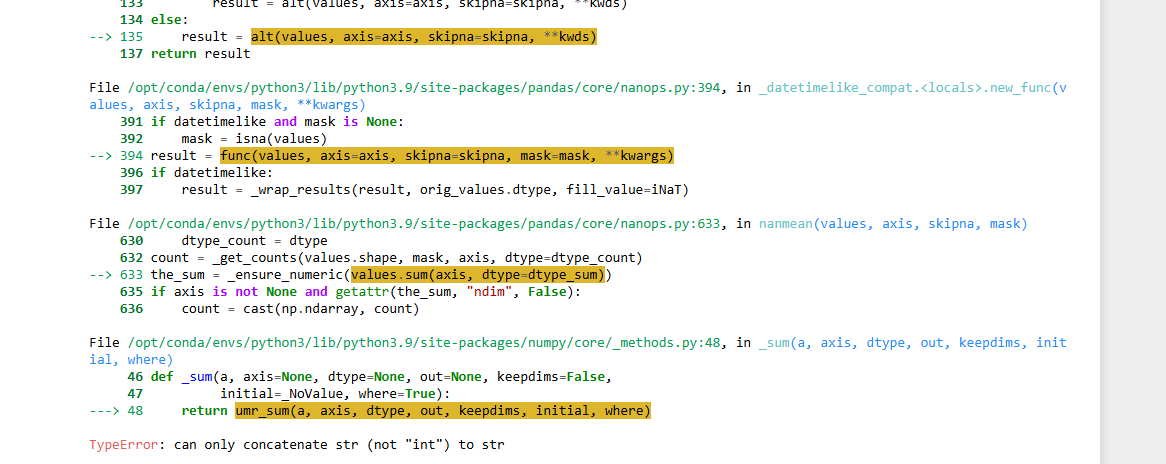

This is my best attempt at a rough draft, I cant for the life of me get the mean function to work on the data slice, I hope I can get input on other areas of this project and then ask a tutor and submit a second draft

Statistical test 2: 
    H0: Average user ratings from the sports and action genres are the same
    
    Proper form: Avg user ratings of sports = Avg user ratings action genre
    
    HA: The average user ratings for sports and action genres are not the same
    
    Proper form: Avg user ratings of sports != Avg user ratings of action genre
    
    Breakdown:I do not expect the user ratings to be the same for the different genres so I have will use alpha = 0.05.
    Will use ttest_ind again because we are comparing two means of different populations.
    
    Result

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Correct interpretation of the Null and Alternative hypotheses

In [ ]:


# sports_slice = games_df[games_df['genre']=='Sports']['user_score']

# sports_column = sports_slice['user_score']

# sports_column = sports_column.astype(float)

# sports_mean = sports_column.mean()



# action_slice =  games_df[games_df['genre']=='Action']['user_score']

# action_column = sports_slice['user_score']

# action_column = action_column.astype(float)

# action_mean = action_column.mean()


alpha = 0.05  # set a critical statistical significance level


results = st.ttest_ind(games_df[games_df['genre']=='Action']['user_score'], games_df[games_df['genre']=='Sports']['user_score'], equal_var = False) #test if the means of the two indep. populations are equal

print('p-value:', results.pvalue)

if ( results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Considering the whole data and not the 'hayday year', games with a critic score above 50 and a user score above 6.2 have a great chance of success especialy games in the sports, racing and platform genres. Sports/racing games are especially popular on the 'wii' system which encourages movement and has impressive haptics. Genres with the most sales appeal to more users because of the competitive aspect, as well as their lightheartedness. In contrast genres like shooters, and adventure games with lower sales are more intense and focus on a specific cult-like niche. Per the statistical tests, we cannot reject either of the null hypotheses, that Average XBOX user ratings = average PC user ratings, and that the average user ratings of genres sports and action equal each other. In conclusion a game that is released on a nintendo, or playstation system or both, and has critic score above 50 and a user score at or above 6.2 has a great chance of acheiving high sales.

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №2__

    
Please correct the conclusions after correction

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №3__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊